In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,100000,2,2,2,26,-1,-1,-1,0,...,3542,1980,3980,4210,4159,1000,1080,2000,1525,0
1,1,100000,1,2,1,47,0,0,2,0,...,64287,67838,66135,7000,0,2500,5500,0,3000,0
2,2,30000,2,2,2,23,3,3,3,3,...,29176,29958,30520,1200,1200,0,1400,1200,0,1
3,3,280000,2,1,2,31,2,-1,-1,-2,...,0,0,0,168,0,0,0,0,0,0
4,4,210000,1,2,1,54,2,-1,-1,-1,...,485,210,3483,176,195,485,0,4466,417,0


In [4]:
df_train.shape

(27000, 25)

In [5]:
sum(df_train.value_counts().isnull())

0

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          27000 non-null  int64
 1   LIMIT_BAL                   27000 non-null  int64
 2   SEX                         27000 non-null  int64
 3   EDUCATION                   27000 non-null  int64
 4   MARRIAGE                    27000 non-null  int64
 5   AGE                         27000 non-null  int64
 6   PAY_0                       27000 non-null  int64
 7   PAY_2                       27000 non-null  int64
 8   PAY_3                       27000 non-null  int64
 9   PAY_4                       27000 non-null  int64
 10  PAY_5                       27000 non-null  int64
 11  PAY_6                       27000 non-null  int64
 12  BILL_AMT1                   27000 non-null  int64
 13  BILL_AMT2                   27000 non-null  int64
 14  BILL_A

<AxesSubplot:>

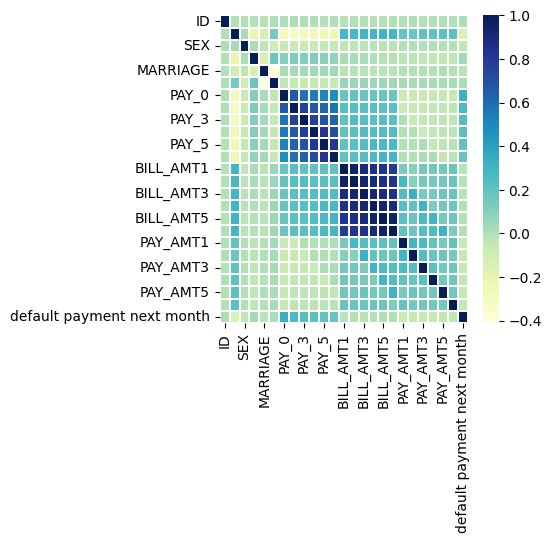

In [7]:
corrmat = df_train.corr()
corrmat
f, ax = plt.subplots(figsize =(4, 4))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [8]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = df_train[df_train['default payment next month']==1]

Valid = df_train[df_train['default payment next month']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [9]:
outlier_fraction

0.2843076630357228

In [10]:
Y = df_train['default payment next month']
Y.head(2)

0    0
1    0
Name: default payment next month, dtype: int64

In [11]:
df_train.drop(['default payment next month', 'ID'], inplace=True, axis=1)
df_train.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,100000,2,2,2,26,-1,-1,-1,0,0,...,4159,3542,1980,3980,4210,4159,1000,1080,2000,1525
1,100000,1,2,1,47,0,0,2,0,0,...,69111,64287,67838,66135,7000,0,2500,5500,0,3000


In [12]:
X = df_train

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.090909,1.0,0.333333,0.666667,0.086207,0.1,0.1,0.1,0.2,0.2,...,0.088628,0.163474,0.082611,0.264037,0.004819,0.002469,0.001116,0.001739,0.004689,0.002893
1,0.090909,0.0,0.333333,0.333333,0.448276,0.2,0.2,0.4,0.2,0.2,...,0.124289,0.220695,0.147914,0.311802,0.008013,0.000000,0.002790,0.008857,0.000000,0.005691
2,0.020202,1.0,0.333333,0.666667,0.034483,0.5,0.5,0.5,0.5,0.4,...,0.102791,0.187621,0.110353,0.284433,0.001374,0.000712,0.000000,0.002254,0.002813,0.000000
3,0.272727,1.0,0.166667,0.666667,0.172414,0.4,0.1,0.1,0.0,0.0,...,0.086345,0.160138,0.080648,0.260979,0.000192,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.202020,0.0,0.333333,0.333333,0.568966,0.4,0.1,0.1,0.1,0.1,...,0.086452,0.160595,0.080856,0.263655,0.000201,0.000116,0.000541,0.000000,0.010471,0.000791


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, Y, test_size=0.33, random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, max_iter=100000).fit(X_train, y_train)

In [66]:
y_pred = LR.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
df_test = pd.read_csv('test.csv')
df_test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,27000,30000,1,2,2,25,0,0,0,0,...,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
1,27001,150000,2,1,2,26,0,0,0,0,...,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669
2,27002,70000,2,3,1,32,0,0,0,0,...,68530,69753,70111,70212,2431,3112,3000,2438,2500,2554
3,27003,130000,1,3,2,49,0,0,0,0,...,16172,16898,11236,6944,1610,1808,7014,27,7011,4408
4,27004,50000,2,2,2,36,0,0,0,0,...,42361,19574,20295,19439,2000,1500,1000,1800,0,1000


In [37]:
sum(df_test.value_counts().isna())

0

In [38]:
df_test.drop(['ID'], inplace=True, axis=1)

In [39]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_test = scaler.fit_transform(df_test)
df_test = pd.DataFrame(df_test)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.025316,0.0,0.333333,0.666667,0.081633,0.2,0.222222,0.2,0.222222,0.222222,...,0.032467,0.029769,0.034844,0.120129,0.005498,0.007014,0.004357,0.006459,0.004942,0.003783
1,0.177215,1.0,0.166667,0.666667,0.102041,0.2,0.222222,0.2,0.222222,0.222222,...,0.243133,0.192674,0.164805,0.233753,0.016443,0.014852,0.009182,0.011398,0.008794,0.005049
2,0.075949,1.0,0.500000,0.333333,0.224490,0.2,0.222222,0.2,0.222222,0.222222,...,0.146614,0.134417,0.149317,0.220919,0.008911,0.010914,0.008714,0.010498,0.008237,0.004831
3,0.151899,0.0,0.500000,0.666667,0.571429,0.2,0.222222,0.2,0.222222,0.222222,...,0.041669,0.037673,0.029810,0.105782,0.005901,0.006341,0.020374,0.000116,0.023100,0.008338
4,0.050633,1.0,0.333333,0.666667,0.306122,0.2,0.222222,0.2,0.222222,0.222222,...,0.094162,0.042571,0.048199,0.128521,0.007331,0.005261,0.002905,0.007751,0.000000,0.001892


In [78]:
test_results = LR.predict(df_test)
test_results

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
len(test_results)

3000

In [94]:
import csv

with open('submission.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(['ID', 'default payment next month'])
    for i in range(27000, 30000):
        employee_writer.writerow([i, test_results[i - 27000]])

In [95]:
df_sub = pd.read_csv('submission.csv')
df_sub.to_csv('submission.csv', index=False)

In [22]:
from sklearn import metrics

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.81672278338945
Precision: 0.7252747252747253
Recall: 0.240625


### ISOLATION FOREST

In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

state = np.random.RandomState(42)

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X_train), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
   
}

n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_train)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X_train)
        y_pred = clf.predict(X_train)
    else:    
        clf.fit(X_train)
        scores_prediction = clf.decision_function(X_train)
        y_pred = clf.predict(X_train)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    # y_pred[y_pred == 1] = 0
    # y_pred[y_pred == -1] = 1
    # n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    # print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y_train,y_pred))
    print("Classification Report :")
    print(classification_report(y_train,y_pred))

c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy Score :
0.13869541182974018
Classification Report :
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     14033
           1       0.19      0.62      0.30      4057

    accuracy                           0.14     18090
   macro avg       0.06      0.21      0.10     18090
weighted avg       0.04      0.14      0.07     18090



c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Accuracy Score :
0.16716417910447762
Classification Report :
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     14033
           1       0.23      0.75      0.36      4057

    accuracy                           0.17     18090
   macro avg       0.08      0.25      0.12     18090
weighted avg       0.05      0.17      0.08     18090



c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [43]:
y_pred_iso = iso_for.predict(X_test,y_test)
y_pred_iso

TypeError: predict() takes 2 positional arguments but 3 were given

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [50]:
X_train.shape

(18090, 23)

In [48]:
from keras.layers.attention.multi_head_attention import activation


model = Sequential()
model.add(Dense(8, input_dim = len(X_train[0,:]), activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())

KeyError: (0, slice(None, None, None))

In [44]:
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [45]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callback_a = ModelCheckpoint(filepath= 'best_mode.hdf5', monitor= 'val_loss', save_best_only= True, save_weights_only=True)
callback_b = EarlyStopping(monitor='val_loss', mode = 'min', patience=20, verbose=1)

In [46]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, batch_size = 16, callbacks=[callback_a, callback_b])

Epoch 1/10


ValueError: in user code:

    File "c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 18090), found shape=(None, 23)
